In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import missingno as msno
import math

In [2]:
#Load dataset
from google.colab import files
uploaded = files.upload()

Saving calories_burn.csv to calories_burn.csv


In [3]:
def visualize_data(filename):
    # Load dataset
    df = pd.read_csv(filename)

    # Automatically detect numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Function to create subplots dynamically
    def plot_numerical(cols, plot_func, title, xlabel):
        if not cols:
            return
        rows = math.ceil(len(cols) / 3)  # Dynamic row calculation
        cols_per_row = min(3, len(cols))  # Maximum 3 columns per row
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(8, 7))
        fig.suptitle(title, fontsize=16)
        axes = np.array(axes).flatten()

        for ax, col in zip(axes, cols):
            plot_func(df[col].dropna(), ax)
            ax.set_title(f'{title} of {col}', fontsize=10)
            ax.set_xlabel(xlabel, fontsize=8)

        for i in range(len(cols), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    # Visualizations
    plot_numerical(num_cols, lambda x, ax: sns.boxplot(x=x, ax=ax), 'Box Plot', 'Values')  # 1st
    plot_numerical(num_cols, lambda x, ax: sns.histplot(x, kde=True, ax=ax), 'Histogram', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.violinplot(x=x, ax=ax), 'Violin Plot', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.kdeplot(x, fill=True, ax=ax), 'Density Plot', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.stripplot(x=x, ax=ax, size=3), 'Strip Plot (Smaller Markers)', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.barplot(x=x, ax=ax), 'Bar Plot', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.histplot(x, kde=True, discrete=True, ax=ax), 'Discrete Histogram', 'Values')
    plot_numerical(num_cols, lambda x, ax: sns.swarmplot(x=x, ax=ax, size=3), 'Swarm Plot (Smaller Markers)', 'Values')

    # Q-Q Plots
    if num_cols:
        rows = math.ceil(len(num_cols) / 3)
        cols_per_row = min(3, len(num_cols))
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(8, 7))
        fig.suptitle('Q-Q Plots', fontsize=16)
        axes = np.array(axes).flatten()

        for ax, col in zip(axes, num_cols):
            stats.probplot(df[col].dropna(), dist="norm", plot=ax)
            ax.set_title(f'Q-Q Plot of {col}', fontsize=10)

        for i in range(len(num_cols), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    # Correlation Heatmap
    if len(num_cols) > 1:
        plt.figure(figsize=(8, 7))
        sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap', fontsize=16)
        plt.show()

    # Categorical Data Visualizations
    if cat_cols:
        plot_numerical(cat_cols, lambda x, ax: sns.countplot(y=df[x], order=df[x].value_counts().index, ax=ax), 'Count Plot', 'Categories')  # 12th

    # Pie Charts
    if cat_cols:
        rows = math.ceil(len(cat_cols) / 3)
        cols_per_row = min(3, len(cat_cols))
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(8, 7))
        fig.suptitle('Pie Charts', fontsize=16)
        axes = np.array(axes).flatten()

        for ax, col in zip(axes, cat_cols):
            df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
            ax.set_title(f'Pie Chart of {col}', fontsize=10)

        for i in range(len(cat_cols), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    # Missing Value Visualizations
    if df.isnull().values.any():
        plt.figure(figsize=(8, 7))
        msno.matrix(df)
        plt.title('Missing Values Matrix', fontsize=16)
        plt.show()

        plt.figure(figsize=(8, 7))
        msno.bar(df)
        plt.title('Missing Values Bar Chart', fontsize=16)
        plt.show()

    # Clustermap
    if len(num_cols) > 1:
        sns.clustermap(df[num_cols].corr(), cmap='coolwarm', annot=True, figsize=(8, 7))
        plt.title('Clustermap of Correlation', fontsize=16)
        plt.show()


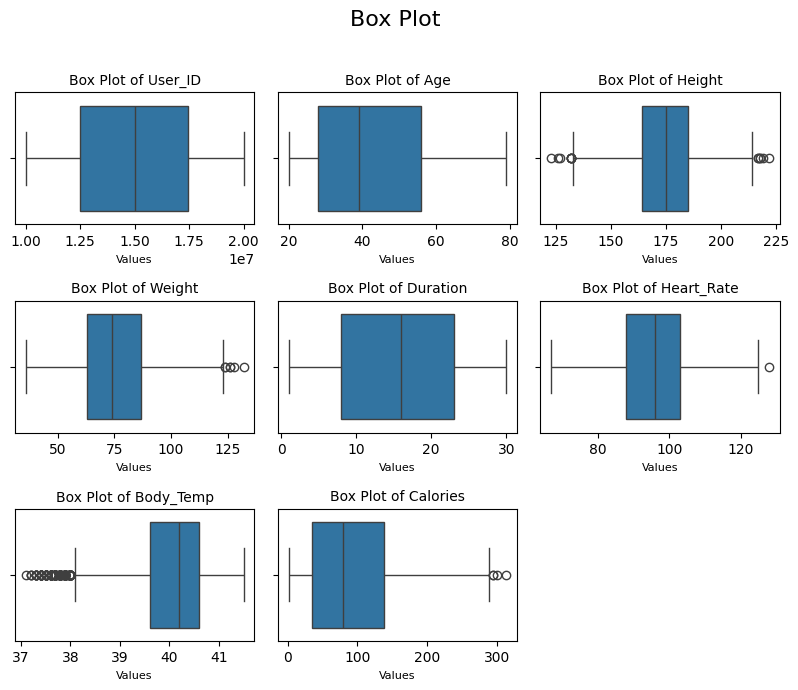

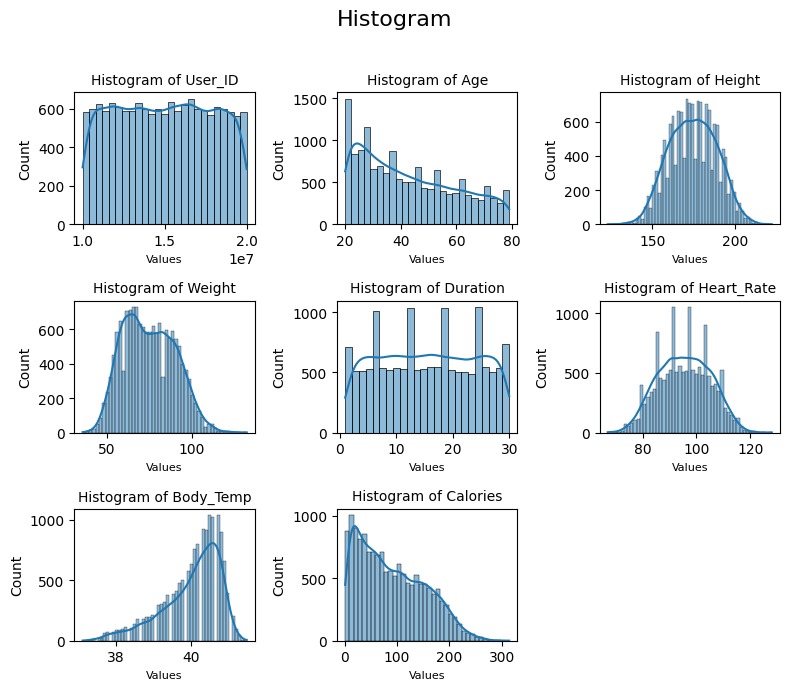

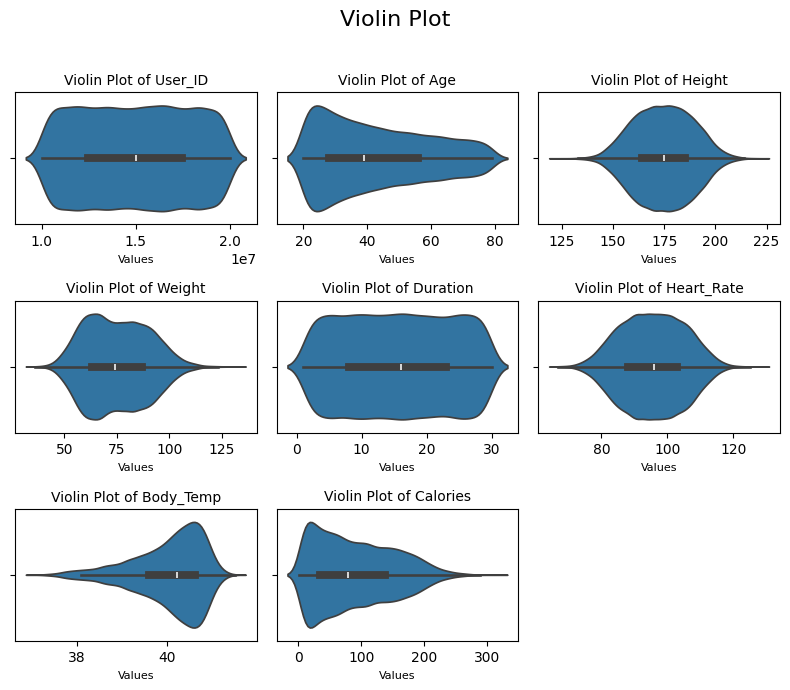

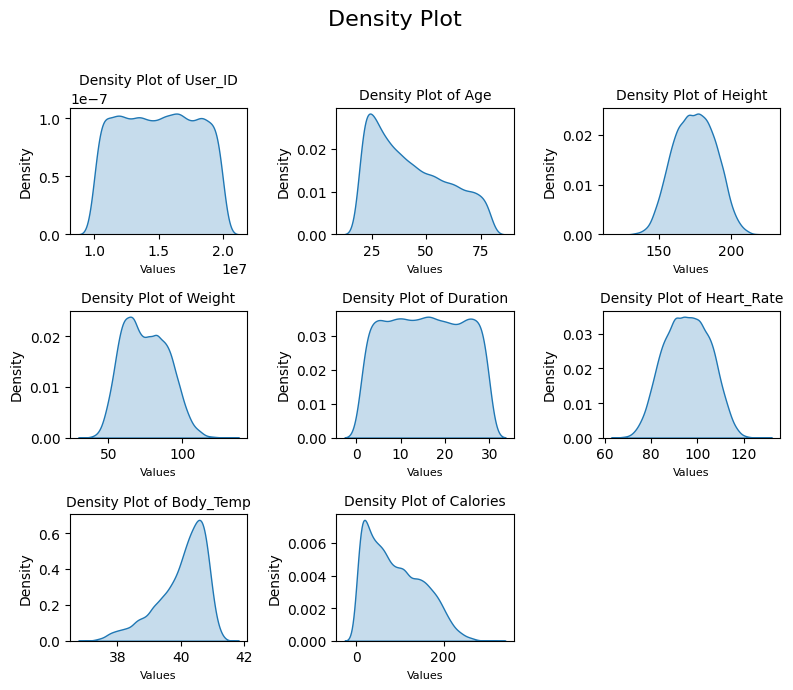

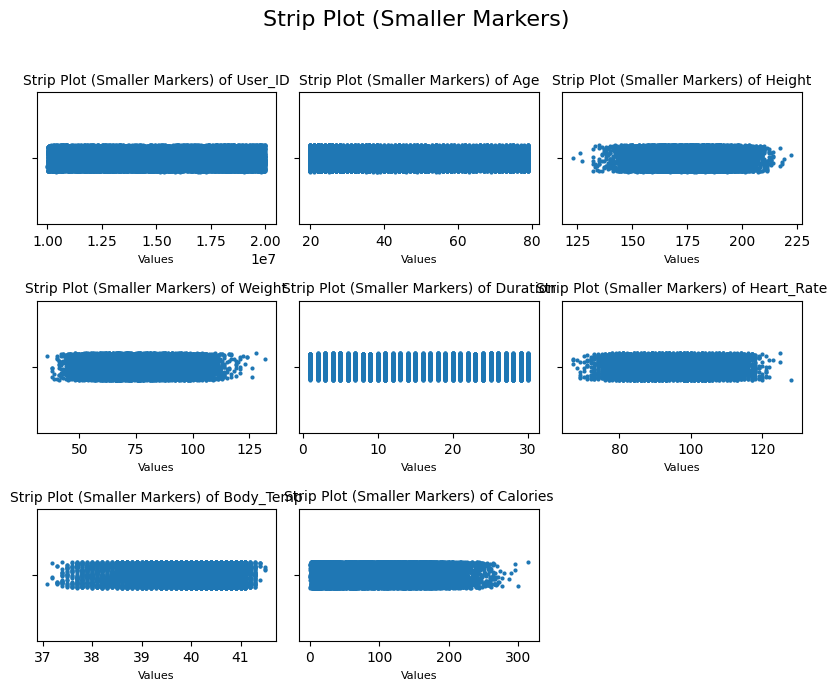

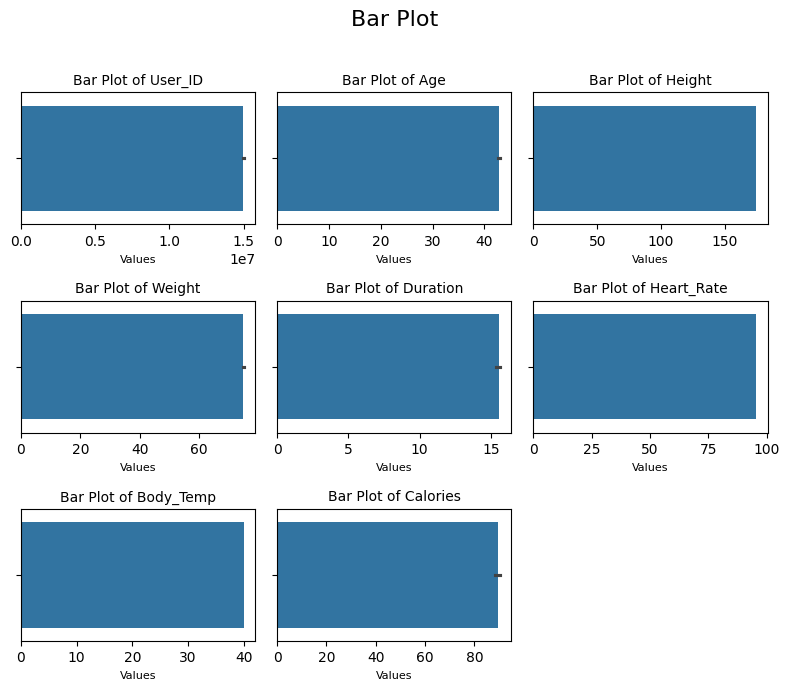

In [ ]:
# Example usage
visualize_data('calories_burn.csv')